# les bibliothèques

In [21]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

# les données

In [22]:
from google.colab import drive
import os, glob
drive.mount('/content/drive/')
iris = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/C4 - Machine Learning/iris_dataset.csv')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


[]

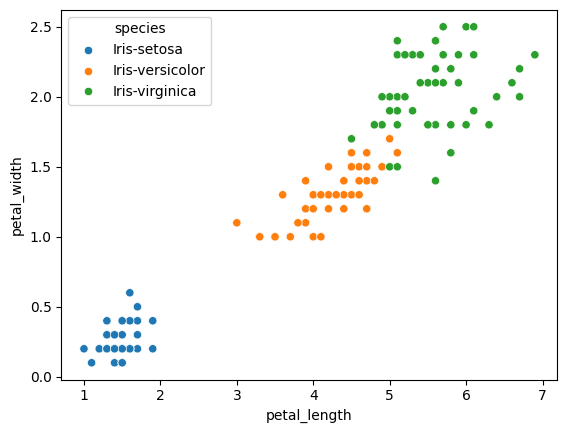

In [23]:
# display(iris.head())
iris.columns.tolist()

sns.scatterplot(data=iris, x='petal_length',
                y='petal_width', hue='species')
plt.plot()

# fonctions de plot decision

In [28]:
def plot_decision_boundary(clf, X, y, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy,Z, cmap='Paired')

    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=20)
    plt.title(title)
    plt.xlabel('Prédicteurs')
    plt.ylabel('Especes')
    plt.show()


# Iris Setosa

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


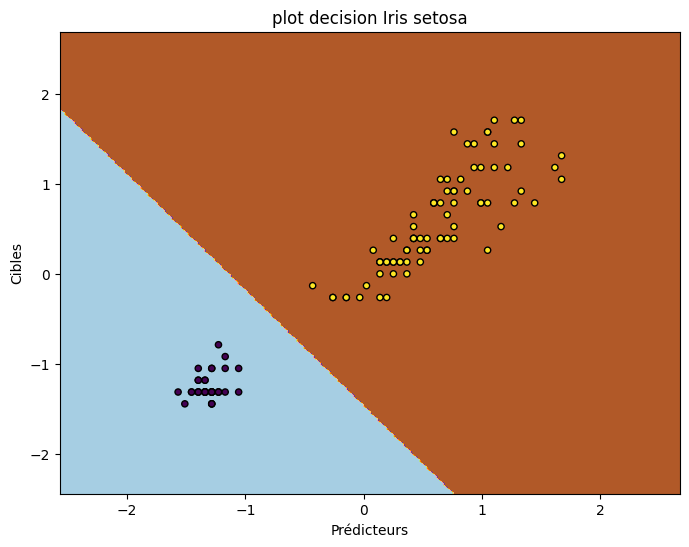

Evaluation du modele iris Setosa:
Precision score: 1.0
Recall score: 1.0
Confusion matrix:
 [[10  0]
 [ 0 20]]
ROC Curve: (array([0., 0., 1.]), array([0., 1., 1.]), array([inf,  1.,  0.]))


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [25]:
# re-étiquetage pour Iris Setosa
iris_setosa = iris.copy()
iris_setosa['species'].replace({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 1}, inplace=True)

# caractéristiques (features) et labels (target)
X = iris_setosa.iloc[:, :-1].values
y = iris_setosa.iloc[:, -1].values
print(y)

# print(X)
# print(y)

# standardisation des données
scaler = StandardScaler()
X = scaler.fit_transform(X)

# diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# modèle LinearSVC
model_setosa = LinearSVC()

# entraînement du modèle
model_setosa.fit(X_train, y_train)

# prediction
y_pred = model_setosa.predict(X_test)

# Plot decision boundary
plot_decision_boundary(model_setosa, X_train, y_train, "plot decision Iris setosa")

# evaluation du modèle
print("Evaluation du modele iris Setosa:")
print("Precision score:", metrics.precision_score(y_test, y_pred))
print("Recall score:", metrics.recall_score(y_test, y_pred))
print("Confusion matrix:\n", metrics.confusion_matrix(y_test, y_pred))
print("ROC Curve:", metrics.roc_curve(y_test, y_pred) )

# hyper-parameter C

param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]


model_setosa.fit(X_train, y_train)

y_pred = model_setosa.predict(X_test)


# Iris Versicolor

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


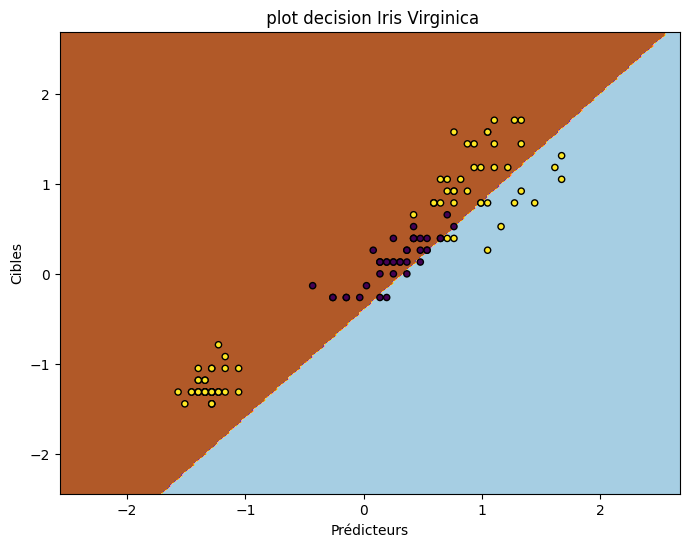

Evaluation Iris Versicolor:
Precision score: 0.72
Recall score: 0.8571428571428571
Confusion matrix:
 [[ 2  7]
 [ 3 18]]
ROC Curve: (array([0.        , 0.77777778, 1.        ]), array([0.        , 0.85714286, 1.        ]), array([inf,  1.,  0.]))


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [26]:
# re-étiquetage pour Iris Versicolor
iris_versicolor = iris.copy()
iris_versicolor['species'].replace({'Iris-setosa': 1, 'Iris-versicolor': 0, 'Iris-virginica': 1}, inplace=True)

# caractéristiques (features) et labels (target)
X = iris_versicolor.iloc[:, :-1].values
y = iris_versicolor.iloc[:, -1].values

# standardisation des données
scaler = StandardScaler()
X = scaler.fit_transform(X)

# diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  modèle LinearSVC
model_versicolor = LinearSVC()

# entraînement du modèle
model_versicolor.fit(X_train, y_train)

# prediction test
y_pred = model_versicolor.predict(X_test)


# Plot decision boundary
plot_decision_boundary(model_versicolor, X_train, y_train, " plot decision Iris Virginica")

# evaluation du modèle
print("Evaluation Iris Versicolor:")
print("Precision score:", metrics.precision_score(y_test, y_pred))
print("Recall score:", metrics.recall_score(y_test, y_pred))
print("Confusion matrix:\n", metrics.confusion_matrix(y_test, y_pred))
print("ROC Curve:",metrics.roc_curve(y_test, y_pred)  )

# hyper-parameter C

param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]


model_versicolor.fit(X_train, y_train)

y_pred = model_versicolor.predict(X_test)


# Iris Virginica

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


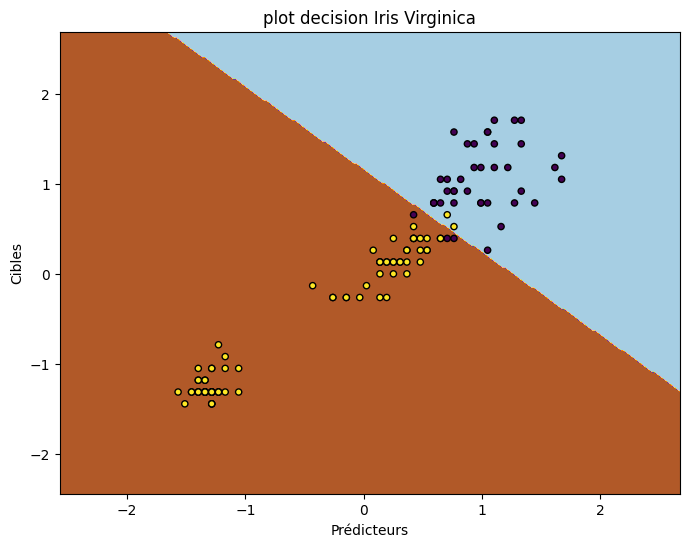

evaluation du modèle Iris Virginica:
Precision score: 1.0
Recall score: 1.0
Confusion matrix:
 [[11  0]
 [ 0 19]]
ROC Curve: (array([0., 0., 1.]), array([0., 1., 1.]), array([inf,  1.,  0.]))


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [27]:
# Re-étiquetage pour Iris Virginica
iris_virginica = iris.copy()
iris_virginica['species'].replace({'Iris-setosa': 1, 'Iris-versicolor': 1, 'Iris-virginica': 0}, inplace=True)

# caractéristiques (features) et labels (target)
X = iris_virginica.iloc[:, :-1].values
y = iris_virginica.iloc[:, -1].values

# standardisation des données
scaler = StandardScaler()
X = scaler.fit_transform(X)

# diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  modèle LinearSVC
model_virginica = LinearSVC()

# entraînement du modèle
model_virginica.fit(X_train, y_train)

# Plot decision boundary
plot_decision_boundary(model_virginica, X_train, y_train, "plot decision Iris Virginica")

# prediction
y_pred = model_virginica.predict(X_test)

# evaluation du modèle
print("evaluation du modèle Iris Virginica:")
print("Precision score:", metrics.precision_score(y_test, y_pred))
print("Recall score:", metrics.recall_score(y_test, y_pred))
print("Confusion matrix:\n", metrics.confusion_matrix(y_test, y_pred))
print("ROC Curve:",metrics.roc_curve(y_test, y_pred)  )

# hyper-parameter C

param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]


model_virginica.fit(X_train, y_train)
y_pred = model_virginica.predict(X_test)